# kaggle - Learn: Intermediate Machine Learning
- https://www.kaggle.com/learn/intermediate-machine-learning
> JM-Future: mk a program to obtain a mini dataset from a big dataset
mantaining cols names and a prportional number of NaN in every col?, ex. to conver melb_data to min_melb_data, three versions or put the % of shrink

## 5.- Exercise: Cross_Validation

### Starting getting trainig and validation sets

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
train_data = pd.read_csv('files/train.csv', index_col='Id')
test_data = pd.read_csv('files/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if
                train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

print(len(test_data.columns), len(numeric_cols))
X.head()

79 36


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


So far, you've learned how to build pipelines with scikit-learn. For instance, the pipeline below will use SimpleImputer() to replace missing values in the data, before using RandomForestRegressor() to train a random forest model to make predictions. We set the number of trees in the random forest model with the n_estimators parameter, and setting random_state ensures reproducibility.

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

You have also learned how to use pipelines in cross-validation. The code below uses the cross_val_score() function to obtain the mean absolute error (MAE), averaged across five different folds. Recall we set the number of folds with the cv parameter.

In [3]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 18276.410356164386


## Step 1: Write a useful function
In this exercise, you'll use cross-validation to select parameters for a machine learning model.

Begin by writing a function get_score() that reports the average (over three cross-validation folds) MAE of a machine learning pipeline that uses:
- the data in X and y to create folds,
- SimpleImputer() (with all parameters left as default) to replace missing values, and
- RandomForestRegressor() (with random_state=0) to fit a random forest model.

The n_estimators parameter supplied to get_score() is used when setting the number of trees in the random forest model.

In [4]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators=n_estimators,
                                        random_state=0))
        ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')

    return scores.mean()

### Step 2: Test different parameter values

Now, you will use the function that you defined in Step 1 to evaluate the model performance corresponding to eight different values for the number of trees in the random forest: 50, 100, 150, ..., 300, 350, 400.

Store your results in a Python dictionary results, where results[i] is the average MAE returned by get_score(i).

In [49]:
results = dict()
ne_min, ne_max, ne_step = 50, 400, 50
for i in range(ne_min, ne_max + 1, ne_step):
    results[i] = get_score(i)

results

{50: 18353.8393511688,
 100: 18395.2151680032,
 150: 18288.730020956387,
 200: 18248.345889801505,
 250: 18255.26922247291,
 300: 18275.241922621914,
 350: 18270.29183308043,
 400: 18270.197974402367}

correct!! & the hint + Solution

Hint: Begin by instantiating the dictionary with results = {}. Then loop over the value for n_estimators that will be plugged into the get_score() function, and use the result to set the value in the dictionary.

Solution:

results = {}
for i in range(1,9):
    results[50*i] = get_score(50*i)

Use the next cell to visualize your results from Step 2. Run the code without changes.

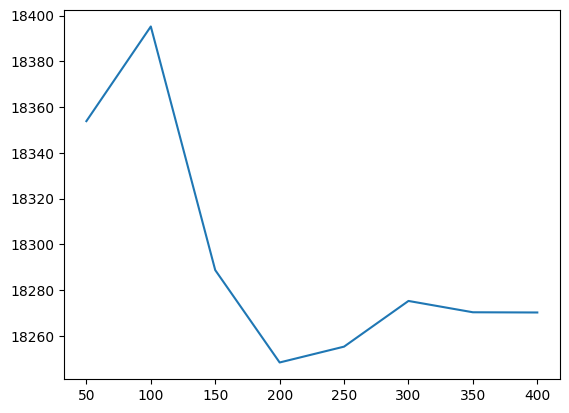

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.plot(list(results.keys()), list(results.values()))
# plt.show()

fig, axe = plt.subplots()

axe.plot(list(results.keys()), list(results.values()))

### Step 3: Find the best parameter value
Given the results, which value for n_estimators seems best for the random forest model? Use your answer to set the value of n_estimators_best.

In [51]:
min_score = min(results.values())
for k in results:
    if results[k] == min_score:
        n_esimators_best = k
        break

print(f'n_esimators_best: {n_esimators_best} -> min_score: {min_score:,.2f}')

n_esimators_best: 200 -> min_score: 18,248.35


In this exercise, you have explored one method for choosing appropriate parameters in a machine learning model.

If you'd like to learn more about hyperparameter optimization, you're encouraged to start with grid search, which is a straightforward method for determining the best combination of parameters for a machine learning model.    
Thankfully, scikit-learn also contains a built-in function GridSearchCV() that can make your grid search code very efficient!

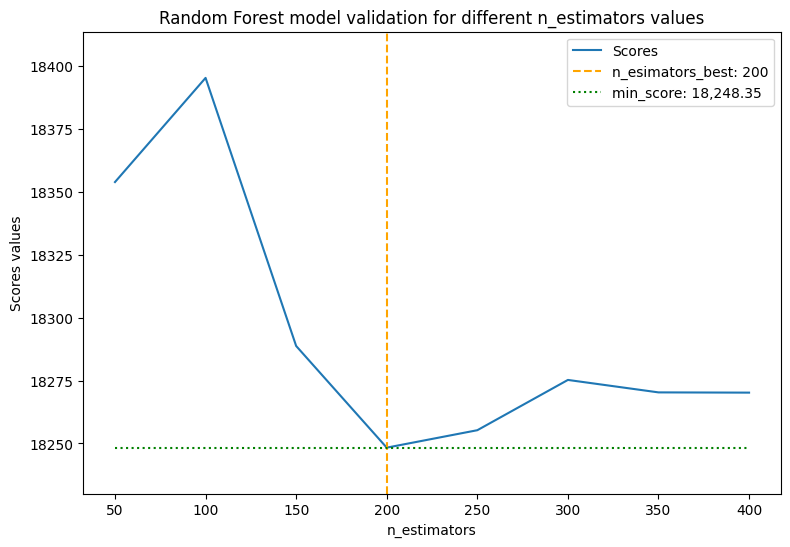

In [52]:
## New graph
max_score = max(results.values())
y_min = min_score - min_score/1000
y_max = max_score + max_score/1000

fig, axe = plt.subplots(figsize=(9,6))

axe.plot(results.keys(), results.values(), label='Scores')
axe.set_ylim(y_min, y_max)
axe.vlines(n_esimators_best, colors='orange', linestyles='--',
           ymin=y_min, ymax=y_max, label=f'n_esimators_best: {n_esimators_best}')
axe.hlines(min_score, colors='green', linestyles='dotted',
           xmin=ne_min, xmax=ne_max, label=f'min_score: {min_score:,.2f}')
axe.set_xlabel('n_estimators')
axe.set_ylabel('Scores values')
axe.set_title('Random Forest model validation for different n_estimators values')
axe.legend()
